# Social Media Disaster Alert System

## Training and Preprocessing

In this notebook we review our cleaned data and look to process it for modeling.

In [8]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import warnings

warnings.filterwarnings('ignore')

We are continuing to use the same dataset that was saved to a csv file in the previous notebook.

In [9]:
final_df = pd.read_csv('./Data/final_df.csv')

Unfortunately whenever a csv file is read into Jupyter Notebook, it is read in with an "Unnamed: 0" column which always has to be dropped.

In [10]:
final_df.drop(columns=['Unnamed: 0'], inplace=True)
final_df.head()

,tweet id,tweet,label,lemmatized_title
0,'262596552399396864',I've got enough candles to supply a Mexican fa...,0.0,i ve got enough candle to supply a mexican family
1,'263044104500420609',Sandy be soooo mad that she be shattering our ...,1.0,sandy be soooo mad that she be shattering our ...
2,'263309629973491712',@ibexgirl thankfully Hurricane Waugh played it...,0.0,ibexgirl thankfully hurricane waugh played it ...
3,'263422851133079552',@taos you never got that magnificent case of B...,0.0,tao you never got that magnificent case of bur...
4,'262404311223504896',"I'm at Mad River Bar &amp; Grille (New York, N...",0.0,i m at mad river bar amp grille new york ny ht...


Additionally null values were also unfortunately read into the notebook. A quick line of code to check and drop nulls value is shown as below.

In [11]:
final_df.isnull().sum()

tweet id            1
 tweet              1
 label              3
lemmatized_title    3
dtype: int64

In [12]:
final_df.dropna(inplace=True)

In [13]:
final_df.shape

(60081, 4)

To prepare our model, we have to specifiy our features and target variable. We will be using the newly lemmatized titles as our features to predict our target variable of " label" which pertains to relevance of the tweet to the disaster.

In [14]:
X = final_df['lemmatized_title']
y = final_df[' label']

The standard train-test split was implemented in order to create a dataset the model will not have seen. This allows us to test our well our model will do on unseen data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y )

The following several codeblocks are combinations of classification models and vectorizers as well as specific parameters that were tuned. Using Pipeline and GridSearchCV, we are able to play around with several different combinations with ease and generate an accuracy score for each model-vector combination.

In [17]:
pipe1 = Pipeline([
    ('cvec',CountVectorizer()),
    ('logreg', LogisticRegression())
])

pipe1_params = {
    'cvec__ngram_range' : [(1,1), (1,2)],
    'cvec__stop_words' : ['english'],
    'cvec__max_features' : [1500, 2000, 2500, 3000],
    'logreg__penalty' : ['l1', 'l2']
}

gs1 = GridSearchCV(pipe1,pipe1_params,cv = 5)
gs1.fit(X_train, y_train)
print(f'The best cross validation score was {gs1.best_score_}.') 
print(f'The best parameters were {gs1.best_params_}.') 
print(f'The model scored {gs1.score(X_train,y_train)} on the training data.')
print(f'The model scored {gs1.score(X_test,y_test)} on the test data.')

The best cross validation score was 0.9492454505104305.
The best parameters were {'cvec__max_features': 1500, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'logreg__penalty': 'l1'}.
The model scored 0.9551930758988016 on the training data.
The model scored 0.9488050063244791 on the test data.


In [15]:
pipe2 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

pipe2_params = {
    'tfidf__ngram_range' : [(1,1), (1,2)],
    'tfidf__stop_words' : ['english'],
    'tfidf__max_features' : [1500, 2000, 2500, 3000]'
    'logreg__penalty' : ['l1', 'l2']
}

gs2 = GridSearchCV(pipe2,pipe2_params,cv = 5)
gs2.fit(X_train, y_train)
print(f'The best cross validation score was {gs2.best_score_}.') 
print(f'The best parameters were {gs2.best_params_}.') 
print(f'The model scored {gs2.score(X_train,y_train)} on the training data.')
print(f'The model scored {gs2.score(X_test,y_test)} on the test data.')

The best cross validation score was 0.9461606746560142.
The best parameters were {'logreg__penalty': 'l1', 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': 'english'}.
The model scored 0.9509542831779849 on the training data.
The model scored 0.9479395512948539 on the test data.


In [16]:
pipe3 = Pipeline([
    ('cvec',CountVectorizer()),
    ('multi', MultinomialNB())
])

pipe3_params = {
    'cvec__ngram_range' : [(1,1), (1,2)],
    'cvec__stop_words' : ['english'],
    'multi__alpha' : [0.0, 0.5, 1.0]
}

gs3 = GridSearchCV(pipe3,pipe3_params,cv = 5)
gs3.fit(X_train, y_train)
print(f'The best cross validation score was {gs3.best_score_}.') 
print(f'The best parameters were {gs3.best_params_}.') 
print(f'The model scored {gs3.score(X_train,y_train)} on the training data.')
print(f'The model scored {gs3.score(X_test,y_test)} on the test data.')

The best cross validation score was 0.9067021748779405.
The best parameters were {'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'multi__alpha': 0.5}.
The model scored 0.985219707057257 on the training data.
The model scored 0.9113241461953265 on the test data.


In [18]:
pipe4 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('multi', MultinomialNB())
])

pipe4_params = {
    'tfidf__ngram_range' : [(1,1), (1,2)],
    'tfidf__stop_words' : ['english'],
    'multi__alpha' : [0.0, 0.5, 1.0]
}

gs4 = GridSearchCV(pipe4,pipe4_params,cv = 5)
gs4.fit(X_train, y_train)
print(f'The best cross validation score was {gs4.best_score_}.') 
print(f'The best parameters were {gs4.best_params_}.') 
print(f'The model scored {gs4.score(X_train,y_train)} on the training data.')
print(f'The model scored {gs4.score(X_test,y_test)} on the test data.')

The best cross validation score was 0.8933865956502441.
The best parameters were {'multi__alpha': 0.5, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}.
The model scored 0.9833999112294718 on the training data.
The model scored 0.8966114106916983 on the test data.


In [42]:
pipe5 = Pipeline([
    ('cvec',CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe5_params = {
    'cvec__ngram_range' : [(1,1), (1,2)],
    'cvec__stop_words' : ['english']
}

gs5 = GridSearchCV(pipe5,pipe5_params,cv = 5)
gs5.fit(X_train, y_train)
print(f'The best cross validation score was {gs5.best_score_}.') 
print(f'The best parameters were {gs5.best_params_}.') 
print(f'The model scored {gs5.score(X_train,y_train)} on the training data.')
print(f'The model scored {gs5.score(X_test,y_test)} on the test data.')

The best cross validation score was 0.9341322680869951.
The best parameters were {'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}.
The model scored 0.9944074567243675 on the training data.
The model scored 0.9365554889820917 on the test data.


In [ ]:
pipe6 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe6_params = {
    'tfidf__ngram_range' : [(1,1), (1,2)],
    'tfidf__stop_words' : ['english'],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5]
}

gs6 = GridSearchCV(pipe6,pipe6_params,cv = 5)
gs6.fit(X_train, y_train)
print(f'The best cross validation score was {gs6.best_score_}.') 
print(f'The best parameters were {gs6.best_params_}.') 
print(f'The model scored {gs6.score(X_train,y_train)} on the training data.')
print(f'The model scored {gs6.score(X_test,y_test)} on the test data.')

In [ ]:
pipe7 = Pipeline([
    ('cvec',CountVectorizer()),
    ('bc', BaggingClassifier())
])

pipe7_params = {
    'cvec__ngram_range' : [(1,1), (1,2)],
    'cvec__stop_words' : ['english']
}

gs7 = GridSearchCV(pipe7,pipe7_params,cv = 5)
gs7.fit(X_train, y_train)
print(f'The best cross validation score was {gs7.best_score_}.') 
print(f'The best parameters were {gs7.best_params_}.') 
print(f'The model scored {gs7.score(X_train,y_train)} on the training data.')
print(f'The model scored {gs7.score(X_test,y_test)} on the test data.')

After running each model-vector combination, the first Pipeline-Gridsearch was found to have performed the best. This combination included a Linear Regression model with a Count Vectorizer. We will use this model-vector combination moving forward in our evaluations and to predict on live Twitter data.

Confusion matrixes allow us to see how many observations were predicted correctly or incorrectly as well as how many false positives or negatives the model predicted. This is an important metric because it gives us insight into what predictions can be conceptually harmful in real-life applications. 

In [29]:
y1_pred = gs1.predict(X_test)

In [30]:
matrix = confusion_matrix(y_test, y1_pred)

In [31]:
matrix

array([[6530,  375],
       [ 394, 7722]])

From the matrix above, the model predicted 375 false negatives and 394 false positives. False negatives are tweets that were predicted to be irrelevant but in reality, there actually was a disaster or an emergency occuring. False positives are tweets were predicted to be relevant, but in reality there was no disaster or emergency. In the future, false negatives should be minimized as they pose a greater threat to the public.

An ROC curve allows to see visualize how a model did in distinguishing between our positive and negative classes. To recall, we set our positive class as "on-topic" and our negative class as "off-topic".

In [25]:
yhat_pp = gs1.predict_proba(X_test)

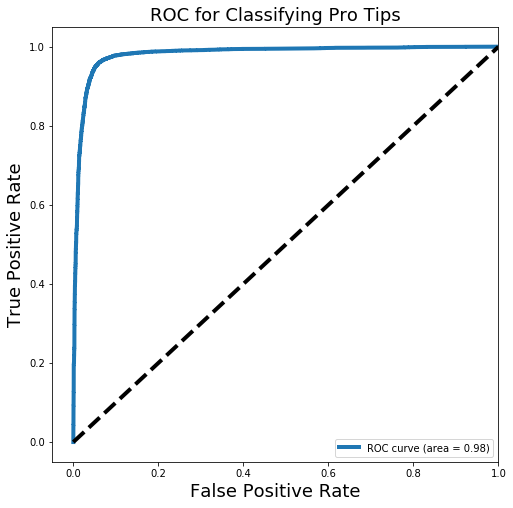

In [26]:
# Plot a ROC Curve and find the area under the curve for class 1 (is_self = True)
# fpr: false positive rate, tpr: true positive rate
fp, tp, thresh = roc_curve(y_test, yhat_pp[:,1])  
roc_auc = auc(fp, tp) 

plt.figure(figsize=[8,8])
plt.plot(fp, tp, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Classifying Pro Tips', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Predicting on Live Data

Using the first Pipeline-GridSearch combination with Linear Regression and Count Vectorizer, we predicted tweet relevance. This dataset is data scraped from Twitter's API so we are looking at very recent tweets from actual users. 

In [4]:
emergency_tweet_final = pd.read_csv('./Sidd_Final/emergency_tweet_final.csv')

In [5]:
emergency_tweet_final.drop(columns='Unnamed: 0', inplace=True)
emergency_tweet_final.head()

,time,text,lat,lon
0,2019-07-30 16:45:02,RT @BloodAid: #Hyderabad #Emergency Need A+ #b...,40.754305,-74.144927
1,2019-07-30 16:43:29,RT @HoxworthUC: #CRITICAL APPEAL: Due to multi...,40.856658,-74.101605
2,2019-07-30 16:43:00,"RT @terapump_socal: No Leak, No Hassle and No ...",40.625146,-73.771159
3,2019-07-30 16:42:56,RT @BloodAid: #Hyderabad #Emergency Need A+ #b...,40.871323,-73.766075
4,2019-07-30 16:42:19,RT @BloodAid: #Hyderabad #Emergency Need A+ #b...,40.619937,-73.992653


"gs1" is our Linear Regression model with CountVectorizer. We are using the same combination to generate an array of predictions on our actual Twitter data and then creating a "label" column in the dataset.

In [18]:
gs1.predict(emergency_tweet_final['text'])

array([1., 0., 0., ..., 0., 1., 0.])

In [21]:
emergency_tweet_final['label'] = gs1.predict(emergency_tweet_final['text'])

In [22]:
emergency_tweet_final.head()

,time,text,lat,lon,label
0,2019-07-30 16:45:02,RT @BloodAid: #Hyderabad #Emergency Need A+ #b...,40.754305,-74.144927,1.0
1,2019-07-30 16:43:29,RT @HoxworthUC: #CRITICAL APPEAL: Due to multi...,40.856658,-74.101605,0.0
2,2019-07-30 16:43:00,"RT @terapump_socal: No Leak, No Hassle and No ...",40.625146,-73.771159,0.0
3,2019-07-30 16:42:56,RT @BloodAid: #Hyderabad #Emergency Need A+ #b...,40.871323,-73.766075,1.0
4,2019-07-30 16:42:19,RT @BloodAid: #Hyderabad #Emergency Need A+ #b...,40.619937,-73.992653,1.0
